## Workflow
- Build a model that can predict consumed fuel from engine speed, speed over ground, and possibly other parameters. Consumed fuel 
- should be the accumulated fuel rate over time.
- Compare the accuracy of the model for different time periods of accumulated fuel
- Analyse the sensitivity of the accumulated fuel to know how much it can deviate.
- Analyse how long time is needed for tuning the model and how it can be corrected over time.

## Typical signals

- fuel rate
- rpm
- torque
- speed over groun

## Import libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1 : With instant fuel consumption  

### EDA

In [2]:
df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')

C:\Users\Kun\AppData\Local\Temp\ipykernel_4644\2478461650.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Kun\Downloads\month_7.csv')


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg'],
      dtype='object')


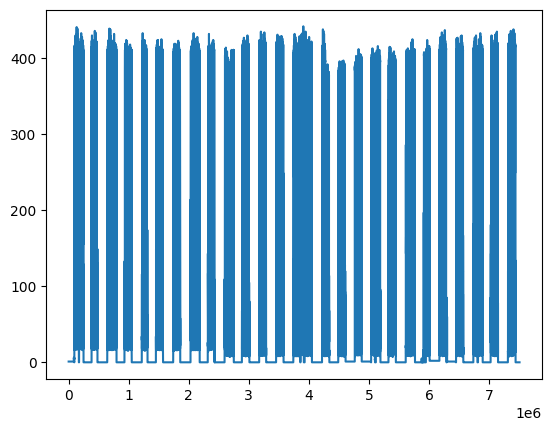

In [4]:
plt.plot(df.index, df.engineFuelRate)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508268 entries, 0 to 7508267
Data columns (total 49 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   timestamp                        object 
 2   engineFuelRate                   float64
 3   engineSpeed                      float64
 4   latitude                         float64
 5   longitude                        float64
 6   windDirectionApparent            float64
 7   windDirectionTrue                float64
 8   windSpeedApparent                float64
 9   windSpeedOverGround              float64
 10  engineTripFuel                   float64
 11  temperature                      float64
 12  magneticVariation                float64
 13  satellites                       float64
 14  pitch                            float64
 15  rateOfTurn                       float64
 16  roll                             float64
 17  pressure

In [6]:
df.describe()

,Unnamed: 0,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,engineTripFuel,...,courseHeadingDiff,distanceFromDock,legId,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,accumFuelLeg,accumDistLeg,accumTimeLeg
count,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508257e+06,7.508268e+06,7.508257e+06,7.508268e+06,...,6.279787e+06,7.508268e+06,7.508268e+06,7.508268e+06,3.004539e+06,3.004539e+06,7.508268e+06,7.508268e+06,7.508268e+06,7.508268e+06
mean,1.177143e+07,9.562101e+01,6.604081e+02,5.934930e+01,1.826353e+01,1.704924e+02,2.001873e+02,5.502877e+00,5.889338e+00,1.581259e+06,...,4.028166e-02,7.764531e+02,2.400067e+03,2.080539e+02,4.238492e+03,4.312047e+03,4.406928e+04,6.223610e+01,7.930796e+03,7.289199e+07
std,2.167450e+06,1.567812e+02,7.989963e+02,3.832677e-02,2.749401e-01,1.072343e+02,9.151485e+01,5.520621e+00,7.446488e+00,2.259699e+04,...,1.835904e+00,1.502595e+03,6.110737e+02,5.428899e+01,3.894385e+03,4.114912e+03,7.626683e+03,2.124450e+02,2.621965e+04,3.395211e+08
min,8.017292e+06,0.000000e+00,0.000000e+00,5.928857e+01,1.807413e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.565720e+05,...,-3.141559e+00,1.803952e-10,1.341000e+03,1.190000e+02,1.428418e-02,1.399229e-01,2.911000e+04,0.000000e+00,0.000000e+00,3.000000e-01
25%,9.894359e+06,0.000000e+00,0.000000e+00,5.933165e+01,1.807912e+01,7.699410e+01,1.316943e+02,1.490000e+00,1.440000e+00,1.563130e+06,...,-1.568868e+00,2.294771e+00,1.862000e+03,1.630000e+02,1.115031e+03,1.141280e+03,3.775600e+04,7.019167e-01,3.864740e+02,4.959000e+02
50%,1.177143e+07,1.000000e+00,0.000000e+00,5.933168e+01,1.807916e+01,1.703432e+02,1.976934e+02,3.080000e+00,2.880000e+00,1.576576e+06,...,8.097961e-02,4.715125e+00,2.365000e+03,2.040000e+02,3.382978e+03,3.435756e+03,4.384300e+04,2.122000e+00,1.234379e+03,2.233800e+03
75%,1.364849e+07,1.040000e+02,1.300500e+03,5.936468e+01,1.837336e+01,2.700923e+02,2.861924e+02,8.230000e+00,6.270000e+00,1.599650e+06,...,1.647647e+00,9.084263e+02,2.918000e+03,2.560000e+02,6.350484e+03,6.412017e+03,5.052700e+04,2.710729e+01,3.751701e+03,1.531020e+04
max,1.552556e+07,4.420000e+02,2.014500e+03,5.948329e+01,1.893374e+01,3.598920e+02,3.598920e+02,4.228000e+01,4.464000e+01,1.617572e+06,...,3.141574e+00,7.826879e+03,3.454000e+03,3.050000e+02,4.270013e+04,4.610433e+04,5.686900e+04,1.255531e+03,1.593426e+05,1.654812e+09


- Checking for missing values

In [7]:
df.engineFuelRate.isnull().sum(), df.engineSpeed.isnull().sum(), df.speedOverGround.isnull().sum()

(0, 0, 0)

-  Futures plots

[Text(0.5, 0, 'Engine Speed'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Engine Speed VS Fuel Rate')]

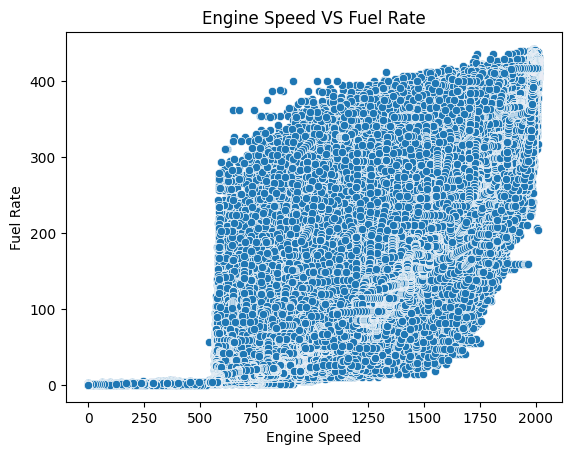

In [8]:
sns.scatterplot(data=df, x=df.engineSpeed, y=df.engineFuelRate).set(xlabel="Engine Speed", ylabel = "Fuel Rate", title= "Engine Speed VS Fuel Rate")

[Text(0.5, 0, 'Speed over ground'),
 Text(0, 0.5, 'Fuel Rate'),
 Text(0.5, 1.0, 'Speed overground VS Fuel Rate')]

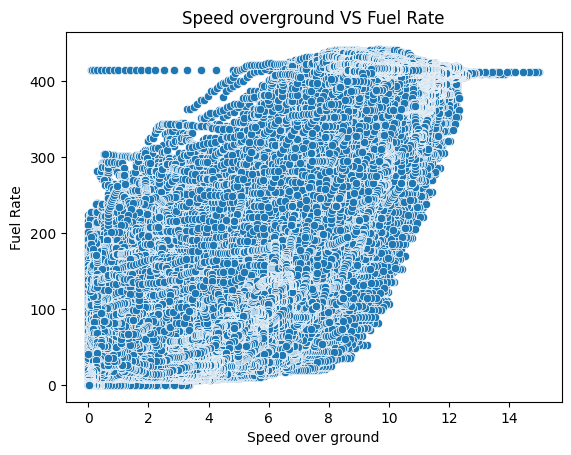

In [9]:
sns.scatterplot(data=df, x=df.speedOverGround, y=df.engineFuelRate).set(xlabel="Speed over ground", ylabel = "Fuel Rate", title= "Speed overground VS Fuel Rate")

- The engine fuel rate is close to zero when Engine Speed is lower than 550.
- Here we think of remove all the outliers before we make the model.

In [3]:
df = df.loc[df.engineSpeed > 550]
df.shape

(3426523, 49)

#### Defind fuel consumption based on every 0.3 second

In [30]:
df['FuelConsumption'] = df['engineFuelRate']*0.3/3600

C:\Users\Kun\AppData\Local\Temp\ipykernel_4644\439285113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FuelConsumption'] = df['engineFuelRate']*0.3/3600


In [12]:
df.FuelConsumption.info()

<class 'pandas.core.series.Series'>
Int64Index: 3426523 entries, 93943 to 7441577
Series name: FuelConsumption
Non-Null Count    Dtype  
--------------    -----  
3426523 non-null  float64
dtypes: float64(1)
memory usage: 52.3 MB


In [31]:
X, y = df[["engineSpeed", "speedOverGround"]], df[["FuelConsumption"]]
X.head(5), y.head(5)

(       engineSpeed  speedOverGround
 93943       752.00         0.074821
 93944       772.75         0.068283
 93945       793.50         0.061961
 93946       766.50         0.055971
 93947       707.00         0.050475,
        FuelConsumption
 93943          0.00025
 93944          0.00025
 93945          0.00025
 93946          0.00025
 93947          0.00025)

In [33]:
X.shape, y.shape

((3426523, 2), (3426523, 1))

## Modeling

### Data split

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2295770, 2),
 (2295770, 1),
 (565376, 2),
 (565376, 1),
 (565377, 2),
 (565377, 1))

#### Feature scaling/Feature standardization

- Normalization (min-max feature scaling)

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_val.min():.2f} ≤ scaled_X_train ≤ {scaled_X_val.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}") 

0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 1.00


In [38]:
scaler_y = MinMaxScaler()
scaler_y.fit_transform(y_train)

scaled_y_train = scaler_y.transform(y_train)
scaled_y_val = scaler_y.transform(y_val)
scaled_y_test = scaler_y.transform(y_test)

print(f"{scaled_y_train.min():.2f} ≤ scaled_y_train ≤ {scaled_y_train.max():.2f}")

0.00 ≤ scaled_y_train ≤ 1.00


## Linear regression algorithm

In [12]:
from code import interact
from sklearn.linear_model import LinearRegression

model_SVD = LinearRegression(fit_intercept = True)
model_SVD.fit(scaled_X_train, scaled_y_train)
print(f"Parameters: {model_SVD.coef_}")
print(f"Intercept: {model_SVD.intercept_}")

model_SVD.score(scaled_X_val, scaled_y_val)

Parameters: [[0.90148414 0.21409697]]
Intercept: [-0.17103806]


0.9361513119200464

In [95]:
import pickle
with open('saved_model/SVD.pickle','wb') as f:
    pickle.dump(model_SVD,f)

### Stochastic gradient descent

In [44]:
from sklearn.linear_model import SGDRegressor

model_SGD = SGDRegressor(loss = "squared_error", learning_rate="invscaling", max_iter = 1000)
model_SGD.fit(scaled_X_train, scaled_y_train)
print(f"Parameters: {model_SGD.coef_}")
print(f"Intercept: {model_SGD.intercept_}")

model_SGD.score(scaled_X_val, scaled_y_val)

c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parameters: [0.89840971 0.21773892]
Intercept: [-0.17022341]


0.9361460851801712

### Manual test


In [19]:
test_sample_features = scaled_X_test[54000].reshape(1,-1)
test_sample_target = y_test.values[54000]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction SGD: {model_SGD.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.28586066 0.00667219]], label 0.0038333
Prediction SVD: 0.0033206
Prediction SGD: 0.0032834


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_SVD = model_SVD.predict(scaled_X_test)
y_pred_SGD = model_SGD.predict(scaled_X_test)

mae_SVD = mean_absolute_error(y_test, y_pred_SVD)
mse_SVD = mean_squared_error(y_test, y_pred_SVD)
rmse_SVD = np.sqrt(mse_SVD)

mae_SGD = mean_absolute_error(y_test, y_pred_SGD)
mse_SGD = mean_squared_error(y_test, y_pred_SGD)
rmse_SGD = np.sqrt(mse_SGD)

print(f"SVD, MAE: {mae_SVD:.7f}, MSE: {mse_SVD:.7f}, RMSE: {rmse_SVD:.7f}")
print(f"SGD, MAE: {mae_SGD:.7f}, MSE: {mse_SGD:.7f}, RMSE: {rmse_SGD:.7f}")

SVD, MAE: 0.0029208, MSE: 0.0000133, RMSE: 0.0036416
SGD, MAE: 0.0029246, MSE: 0.0000133, RMSE: 0.0036416


In [16]:
pred_SVD = model_SVD.predict(scaled_X_test)
pred_SVD.shape

(565377,)

Error figure between y_test and predictors

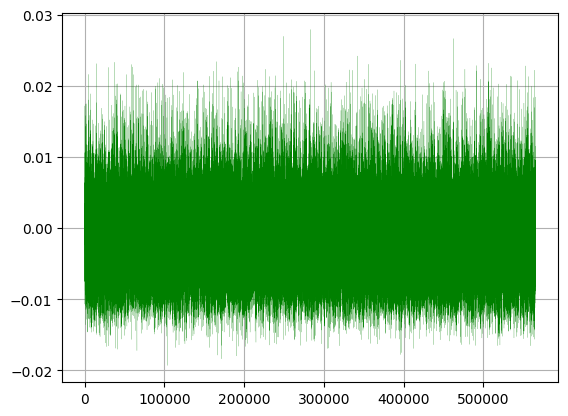

In [22]:
t = np.arange(len(scaled_X_test))
error = y_test-pred_SVD
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

## Polynomial regression

- By thinking of the interaction effects between EngineSpeed and SpeedOverGround, I try to use polynomial regression with higher degrees.

### Compare with RMSE with different degrees

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:


# MAE_val = []

# for degree in range(1,10):
#     model_poly = PolynomialFeatures(degree, include_bias=False)

#     train_features = model_poly.fit_transform(X_train) # find out the polynomial combinations on training data
#     val_features = model_poly.transform(X_val) # find out the polynomial combinations on validation data
#     model_lin_reg = LinearRegression() # regression model fit 

#     model_lin_reg.fit(train_features, y_train) 

#     y_pred_val = model_lin_reg.predict(val_features) # use the model from train data to predict Y on validation data
    
#     MAE_val.append(mean_absolute_error(y_val, y_pred_val))

In [25]:
# fig, ax = plt.figure(), plt.axes()

# ax.plot(range(1,10), MAE_val[:10],'--o', label = "Validation")
# ax.set(xlabel = "Degree", ylabel = "MAE", title = "MAE on validation data for different degrees of polynomial")

In [46]:
poly_model_4 = PolynomialFeatures(4, include_bias=False)
X_train_features = poly_model_4.fit_transform(scaled_X_train)
print(X_train_features.shape)

model_poly = LinearRegression()
model_poly.fit(X_train_features, scaled_y_train)

(2295770, 14)


LinearRegression()

In [47]:
X_features_val_4_degree = poly_model_4.fit_transform(scaled_X_val)

model_poly.score(X_features_val_4_degree,scaled_y_val)

0.9888413808863933

In [48]:
X_features_test_4_degree = poly_model_4.fit_transform(scaled_X_test)
pred_poly_test = model_poly.predict(X_features_test_4_degree)

In [49]:
mae_Poly = mean_absolute_error(scaled_y_test, pred_poly_test)
mse_Poly = mean_squared_error(scaled_y_test, pred_poly_test)
rmse_Poly = np.sqrt(mse_SGD)

print(f"Polynormial, MAE: {mae_Poly:.7f}, MSE: {mse_Poly:.7f}, RMSE: {rmse_Poly:.7f}")

Polynormial, MAE: 0.0206256, MSE: 0.0017148, RMSE: 0.0036416


In [50]:
import pickle

In [51]:
with open('saved_model/poly.pickle','wb') as f:
    pickle.dump(model_poly,f)

Error figure between y_test and predictors

In [30]:
# t = np.arange(len(scaled_X_test))
# error = y_test-pred_poly_test
# plt.plot(t, error, 'g-', linewidth = 0.1)
# plt.title = ('Compare y_test & predictors')
# plt.grid()
# plt.show()

### Manual test

In [31]:
test_sample_features = scaled_X_test[67333].reshape(1,-1)
test_sample_target = y_test.values[67333]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")

Scaled features [[0.99692623 0.77530856]], label 0.0340833
Prediction SVD: 0.0329256
Prediction PolyNormial: 0.0342094


## KNN regression model

- evaluate the KNN model with different k

In [52]:
from sklearn import neighbors

In [33]:


# mae_val = []
# for K in range(15):
#     K = K+1
#     model_knn = neighbors.KNeighborsRegressor(n_neighbors = K)

#     model_knn.fit(scaled_X_train, y_train)  # fit the model
#     pred=model_knn.predict(scaled_X_test) # make prediction on test set
#     error = mean_absolute_error(y_test,pred) # calculate mae
#     mae_val.append(error) # store mae values
#     print('MAE value for k= ' , K , 'is:', error , 'Score(correlation) is:', model_knn.score(scaled_X_test, y_test))

In [34]:
# fig, ax = plt.figure(), plt.axes()
# ax.plot(range(1,15), mae_val[:15],'--o', label = "Validation")
# ax.set(xlabel = "K-value", ylabel = "MAE", title = "MAE on validation data for different k")

In [53]:
from sklearn import neighbors

knn_reg = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform') # the defalt value of k is 5
knn_reg.fit(scaled_X_train, scaled_y_train)
knn_reg.score(scaled_X_val, scaled_y_val)

0.9908557182831144

In [54]:
pred_knn_test = knn_reg.predict(scaled_X_test)

In [55]:
mae_knn = mean_absolute_error(scaled_y_test, pred_knn_test)
mse_knn = mean_squared_error(scaled_y_test, pred_knn_test)
rmse_knn = np.sqrt(mse_knn)

print(f"Polynormial, MAE: {mae_knn:.7f}, MSE: {mse_knn:.7f}, RMSE: {rmse_knn:.7f}")

Polynormial, MAE: 0.0150882, MSE: 0.0014106, RMSE: 0.0375580


In [38]:
test_sample_features = scaled_X_test[234567].reshape(1,-1)
test_sample_target = y_test.values[234567]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")
print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.99692623 0.78899587]], label 0.0343333
Prediction SVD: 0.0330333
Prediction PolyNormial: 0.0339953
Prediction KNN: 0.0342262


In [56]:
with open('saved_model/knn.pickle','wb') as f:
    pickle.dump(knn_reg,f)

In [39]:
# t = np.arange(len(scaled_X_test))
# error = y_test-pred_knn_test
# plt.plot(t, error, 'g-', linewidth = 0.1)
# plt.title = ('Compare y_test & predictors')
# plt.grid()
# plt.show()

#### Choosing the right value for K

- As decreasing the value of K to 1, the predictions become less stable. (overfitting)
- As we increase the value of K, our predictions become more stable due to majority voting / averaging. However, we begin to witness an increasing number of errors. (underfitting) The model will be more likely to close to Linear regression.
- we usually make K an odd number to have a tiebreaker.

#### Advantages & disadvantages for KNN

- The algorithm is simple and easy to implement.
- There’s no need to build a model, tune several parameters, or make additional assumptions.
- It can used for both classification and regression.

- The algorithm gets significantly slower as the number of data size and features increase. (Not suggest for more than 3 features. The prediction will be not stable because the curse of dimensionality)

- references:
https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

## Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
# mae_val_tree = []

# for d in range(20):
#     d = d+1
    
#     model_tree_regression = DecisionTreeRegressor(max_depth = d) 
#     model_tree_regression.fit(X_train, y_train)  # fit the model
#     pred = model_tree_regression.predict(X_test) # make prediction on test set
#     error = mean_absolute_error(y_test,pred) # calculate mae
#     mae_val_tree.append(error) # store mae values
#     print('MAE value for max_depth= ' , d , 'is:', error , 'Score is:', model_tree_regression.score(X_test, y_test))

In [42]:
# curve = pd.DataFrame(mae_val_tree) 
# curve.plot(title = "MAE vs max_depth")

In [58]:
model_tree_regression = DecisionTreeRegressor(max_depth = 7) 

In [59]:
model_tree_regression.fit(scaled_X_train, scaled_y_train) 
# Decision trees methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data.

model_tree_regression.feature_importances_
# return how importent the feature is!

array([0.05561707, 0.94438293])

In [45]:
# from sklearn import tree

# fig, ax = plt.figure(figsize=(12,5), dpi=100), plt.axes()
# tree.plot_tree(model_tree_regression, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);

In [46]:
# print(tree.export_text(model_tree_regression, feature_names = list(X_train.columns)))

In [60]:
y_tree_pred = model_tree_regression.predict(scaled_X_test)

mae_tree = mean_absolute_error(scaled_y_test, y_tree_pred)
mse_tree = mean_squared_error(scaled_y_test, y_tree_pred)
rmse_tree = np.sqrt(mse_tree)

print(f"Decision tree, MAE: {mae_tree:.7f}, MSE: {mse_tree:.7f}, RMSE: {rmse_tree:.7f}")

Decision tree, MAE: 0.0162183, MSE: 0.0014331, RMSE: 0.0378566


In [61]:
model_tree_regression.score(scaled_X_val, scaled_y_val)

0.9907049712127739

In [49]:
# t = np.arange(len(scaled_X_test))
# error = y_test-y_tree_pred
# plt.plot(t, error, 'g-', linewidth = 0.1)
# plt.title = ('Compare y_test & predictors')
# plt.grid()
# plt.show()

In [50]:
X_test_tree = np.array(X_test)[234567].reshape(1,-1)
test_sample_features = scaled_X_test[234567].reshape(1,-1)
test_sample_target = y_test.values[234567]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")

print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")
print(f"Prediction Decision tree: {model_tree_regression.predict(X_test_tree)[0]:.7f}")

Scaled features [[0.99692623 0.78899587]], label 0.0343333
Prediction SVD: 0.0330333
Prediction PolyNormial: 0.0339953
Prediction KNN: 0.0342262
Prediction Decision tree: 0.0341572


c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [62]:
with open('saved_model/tree_regression.pickle','wb') as f:
    pickle.dump(model_tree_regression,f)

## Gradient Boosting Regressor (Gradient Boosting Decision Tree, GBDT)
- The reason to select this model because of its good performance for time series data based on literatures

reference : https://arxiv.org/abs/2101.02118

In [63]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [64]:
gbr = GBR() 
# We use all the hyper parameters as default
# n_estimators=100, learning=0.1, max_deptht=3
gbr.fit(scaled_X_train, scaled_y_train)

c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [65]:
gbr.score(scaled_X_val, scaled_y_val)

0.9909146736391223

In [42]:
y_gbr_pred = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_gbr_pred)
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Regressor, MAE: {mae_gbr:.7f}, MSE: {mse_gbr:.7f}, RMSE: {rmse_gbr:.7f}")

Gradient Boosting Regressor, MAE: 0.0005845, MSE: 0.0000019, RMSE: 0.0013758


In [ ]:
y_gbr_pred = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_gbr_pred)
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Regressor, MAE: {mae_gbr:.7f}, MSE: {mse_gbr:.7f}, RMSE: {rmse_gbr:.7f}")

Gradient Boosting Regressor, MAE: 0.0005259, MSE: 0.0000017, RMSE: 0.0013045


#### Hyper parameters tuning

- min_samples_split: This should be ~0.5-1% of total values.
- min_samples_leaf : Can be selected based on intuition. This is just used for preventing overfitting and again a small value because of imbalanced classes.
- max_depth : Should be chosen (5-8) based on the number of observations and predictors.
- max_features = ‘sqrt’ : Its a general thumb-rule to start with square root.

reference: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

For instance, if min_samples_split = 5, and there are 7 samples at an internal node, then the split is allowed. But let's say the split results in two leaves, one with 1 sample, and another with 6 samples. If min_samples_leaf = 2, then the split won't be allowed (even if the internal node has 7 samples) because one of the leaves resulted will have less then the minimum number of samples required to be at a leaf node.

In [58]:
# from sklearn.model_selection import GridSearchCV

# param_test = {'min_samples_split':range(20,101,20)} 
# gsearch = GridSearchCV(estimator = GBR(learning_rate=0.1, max_features='sqrt', max_depth = 7), 
# param_grid = param_test,n_jobs=4, cv=5) 
# gsearch.fit(X_train, y_train)

# gsearch.best_score_, gsearch.best_params_

In [59]:
# gbr = GBR(max_depth = 7, min_samples_split = 60)
# gbr.fit(X_train, y_train)
# gbr.score(X_val, y_val)

In [66]:
gbr = GBR(max_depth = 7) 
gbr.fit(scaled_X_train, scaled_y_train)
gbr.score(scaled_X_val, scaled_y_val)

c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.991828762484645

In [67]:
with open('saved_model/gbr.pickle','wb') as f:
    pickle.dump(gbr,f)

### XGboost model

In [81]:
import xgboost as xgb

In [82]:

xgbr = xgb.XGBRegressor(max_depth=7, booster='gbtree') 

In [83]:
xgbr.fit(scaled_X_train, scaled_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [84]:
xgbr.score(scaled_X_val, scaled_y_val)

0.9919273624471636

In [85]:
y_xgbr_pred = xgbr.predict(scaled_X_test)

mae_xgbr = mean_absolute_error(scaled_y_test, y_xgbr_pred)
mse_xgbr = mean_squared_error(scaled_y_test, y_xgbr_pred)
rmse_xgbr = np.sqrt(mse_xgbr)

print(f"Xgb Regressor, MAE: {mae_xgbr:.7f}, MSE: {mse_xgbr:.7f}, RMSE: {rmse_xgbr:.7f}")

Xgb Regressor, MAE: 0.0141914, MSE: 0.0012439, RMSE: 0.0352684


In [73]:
with open('saved_model/xgbr.pickle','wb') as f:
    pickle.dump(xgbr,f)

## Random forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [76]:
rfr.fit(scaled_X_train, scaled_y_train)

score = rfr.score(scaled_X_val, scaled_y_val)
print("R-squared:", score) 

C:\Users\Kun\AppData\Local\Temp\ipykernel_15496\189915855.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(scaled_X_train, scaled_y_train)


R-squared: 0.9904072794740668


In [94]:
ypred_rfr = rfr.predict(scaled_X_test)

mae_rfr = mean_absolute_error(y_test, ypred_rfr)
mse_rfr = mean_squared_error(y_test, ypred_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print(f"Random forest, MAE: {mae_rfr:.7f}, MSE: {mse_rfr:.7f}, RMSE: {rmse_rfr:.7f}")

Random forest, MAE: 0.4549558, MSE: 0.3497960, RMSE: 0.5914356


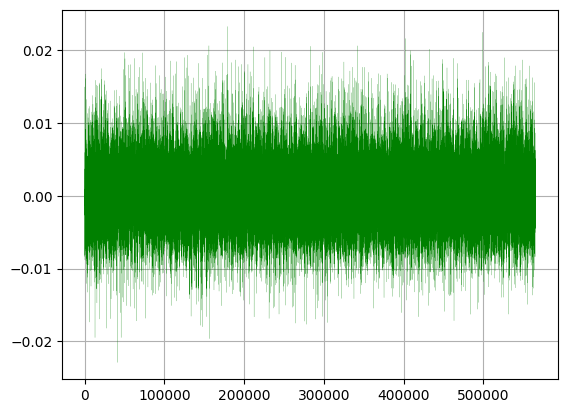

In [70]:
t = np.arange(len(scaled_X_test))
error = y_test-ypred_rfr
plt.plot(t, error, 'g-', linewidth = 0.1)
plt.title = ('Compare y_test & predictors')
plt.grid()
plt.show()

In [71]:
X_test_tree = np.array(X_test)[234567].reshape(1,-1)
test_sample_features = scaled_X_test[234567].reshape(1,-1)
test_sample_target = y_test.values[234567]

print(f"Scaled features {test_sample_features}, label {test_sample_target:.7f}")

print(f"Prediction SVD: {model_SVD.predict(test_sample_features)[0]:.7f}")
print(f"Prediction PolyNormial: {model_poly.predict(poly_model_4.transform(test_sample_features))[0]:.7f}")
print(f"Prediction KNN: {knn_reg.predict(test_sample_features)[0]:.7f}")
print(f"Prediction Decision tree: {model_tree_regression.predict(X_test_tree)[0]:.7f}")
print(f"Prediction GBR: {gbr.predict(X_test_tree)[0]:.7f}")
print(f"Prediction rfr: {rfr.predict(test_sample_features)[0]:.7f}")

Scaled features [[0.99692623 0.78899587]], label 0.0343333
Prediction SVD: 0.0330333
Prediction PolyNormial: 0.0339953
Prediction KNN: 0.0342262


c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Prediction Decision tree: 0.0341572
Prediction GBR: 0.0341716
Prediction rfr: 0.0341807


In [77]:
with open('saved_model/rfr.pickle','wb') as f:
    pickle.dump(rfr,f)

MemoryError: 

- The test of Random forest got a best score of coefficient, however, the running time was much slower than other algorithms.

|      Models      |       MAE      |     Score (corralation coefficient)    |
|-----------------|-----------------|---------------|
|     Linear Regression     |       0.0029208       |       0.93615       |
|         SGD        |        0.0029189         |     0.93612    | 
|           Polynormial Regression      |         0.0007580     |   0.98884 |
|             KNN    |         0.0005545      |       0.99086        | 
|             Decision Trees |         0.0005960      |      0.99070    | 
|             Gradient Boosting Decision Tree   |         0.0005259      |      0.99182  | 
|             XGboost   |         0.0005253      |      0.99187  (Best score)  | 
|             Random Forest  |         0.0005611     |      0.99042    | 


- Here skip the GridSearchCV fot tuning the models because of the huge size of data, and also the high score from each model.

### Clean the data frame into only x,y, cal_x and predictors

In [397]:
df_test = df.drop(y_train.index)
df_test = df_test.drop(y_val.index)
df_test.shape

(565377, 50)

In [398]:
X_sample_test, y_sample_test = df_test[["engineSpeed", "speedOverGround"]], df_test["FuelConsumption"]
X_sample_test.head(5), y_sample_test.head(5)

(       engineSpeed  speedOverGround
 93944       772.75         0.068283
 93945       793.50         0.061961
 93954       658.50         0.036678
 93955       658.00         0.038242
 93962       658.00         0.051300,
 93944    0.000250
 93945    0.000250
 93954    0.000333
 93955    0.000333
 93962    0.000417
 Name: FuelConsumption, dtype: float64)

In [399]:
scaler = MinMaxScaler()
scaler.fit(X_sample_test)

scaled_X_sample = scaler.transform(X_sample_test)

In [403]:
df_test['FuelPred_SVD'] = model_SVD.predict(scaled_X_sample)

X_features_test = poly_model_4.fit_transform(scaled_X_sample)

df_test['FuelPred_Poly'] = model_poly.predict(X_features_test)

df_test['FuelPred_knn'] = knn_reg.predict(scaled_X_sample)

df_test['FuelPred_tree'] = model_tree_regression.predict(X_sample_test)

df_test['FuelPred_gbr'] = gbr.predict(X_sample_test)

df_test['FuelPred_xgbr'] = xgbr.predict(X_sample_test)

df_test['FuelPred_rfr'] = rfr.predict(scaled_X_sample)

df_test.columns

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg',
       'FuelConsumption', 'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn',
       'F

In [404]:
bins_rpm = [550, 800, 1100, 1400, 1700, 2015]
bins_speed = [0, 3, 6, 9, 12, 15]

In [405]:
df_test["Cat_rpm"] = pd.cut(df["engineSpeed"], bins_rpm)
df_test["Cat_speed"] = pd.cut(df["speedOverGround"], bins_speed)

In [406]:
df_test["Cat_rpm"].unique()

[(550, 800], (800, 1100], (1100, 1400], (1400, 1700], (1700, 2015]]
Categories (5, interval[int64, right]): [(550, 800] < (800, 1100] < (1100, 1400] < (1400, 1700] < (1700, 2015]]

In [407]:
df_test["Cat_speed"].unique()

[(0.0, 3.0], (3.0, 6.0], (6.0, 9.0], (9.0, 12.0], (12.0, 15.0], NaN]
Categories (5, interval[int64, right]): [(0, 3] < (3, 6] < (6, 9] < (9, 12] < (12, 15]]

In [408]:
df_test_fuel_speed = df_test[['engineFuelRate', 'engineSpeed', 'FuelConsumption', 'speedOverGround', "Cat_rpm", 'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn', 'FuelPred_tree', 'FuelPred_gbr', 'FuelPred_xgbr', 'FuelPred_rfr']]

In [409]:
sample_1 = df_test_fuel_speed.sample(n=50000)

In [410]:
sample_1_rpm_1 = sample_1[sample_1.Cat_rpm == pd.Interval(550, 800)]
sample_1_rpm_2 = sample_1[sample_1.Cat_rpm == pd.Interval(800, 1100)]
sample_1_rpm_3 = sample_1[sample_1.Cat_rpm == pd.Interval(1100, 1400)]
sample_1_rpm_4 = sample_1[sample_1.Cat_rpm == pd.Interval(1400, 1700)]
sample_1_rpm_5 = sample_1[sample_1.Cat_rpm == pd.Interval(1700, 2015)]

In [411]:
sample_1_rpm_1.shape, sample_1_rpm_2.shape, sample_1_rpm_3.shape, sample_1_rpm_4.shape, sample_1_rpm_5.shape

((7922, 12), (8304, 12), (9354, 12), (2596, 12), (21824, 12))

In [412]:
from sklearn import metrics

In [436]:
score_df_test = metrics.r2_score(df_test.FuelConsumption, df_test.FuelPred_xgbr)
score_df_test

0.9918951125837393

In [435]:
score_sample_1 = metrics.r2_score(sample_1.FuelConsumption, sample_1.FuelPred_xgbr)
score_sample_1

0.991941454654554

In [432]:
score_sample_1_rpm_1 = metrics.r2_score(sample_1_rpm_1.FuelConsumption, sample_1_rpm_1.FuelPred_xgbr)
score_sample_1_rpm_2 = metrics.r2_score(sample_1_rpm_2.FuelConsumption, sample_1_rpm_2.FuelPred_xgbr)
score_sample_1_rpm_3 = metrics.r2_score(sample_1_rpm_3.FuelConsumption, sample_1_rpm_3.FuelPred_xgbr)
score_sample_1_rpm_4 = metrics.r2_score(sample_1_rpm_4.FuelConsumption, sample_1_rpm_4.FuelPred_xgbr)
score_sample_1_rpm_5 = metrics.r2_score(sample_1_rpm_5.FuelConsumption, sample_1_rpm_5.FuelPred_xgbr)

In [433]:
score_sample_1_rpm_1, score_sample_1_rpm_2, score_sample_1_rpm_3, score_sample_1_rpm_4, score_sample_1_rpm_5

(0.5901114935171462,
 0.6276703905361245,
 0.6304828099343573,
 0.6852454839113958,
 0.8926236674317075)

<AxesSubplot: title={'center': 'rpm range 550 - 800'}, xlabel='speedOverGround', ylabel='FuelConsumption'>

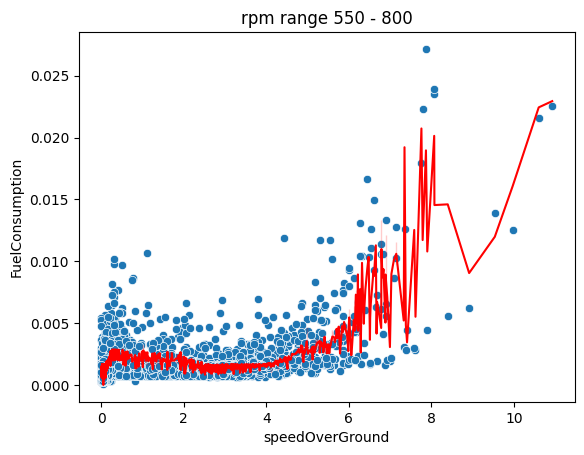

In [326]:
sns.scatterplot(data=sample_1_rpm_1, x="speedOverGround", y="FuelConsumption").set(title="rpm range 550 - 800")
sns.lineplot(data=sample_1_rpm_1, x="speedOverGround", y="FuelPred_xgbr", color="r")

<AxesSubplot: title={'center': 'rpm range 800 - 1100'}, xlabel='speedOverGround', ylabel='FuelConsumption'>

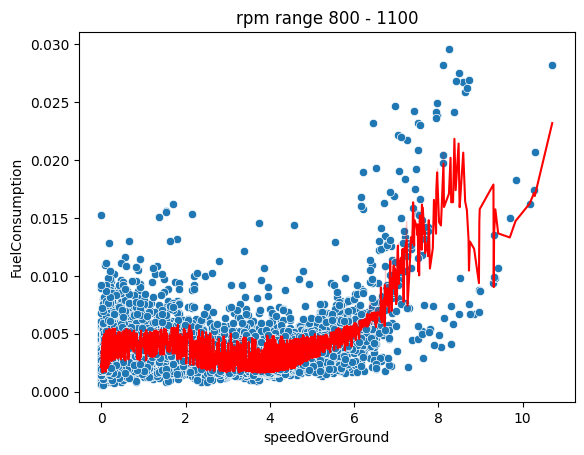

In [327]:
sns.scatterplot(data=sample_1_rpm_2, x="speedOverGround", y="FuelConsumption").set(title="rpm range 800 - 1100")
sns.lineplot(data=sample_1_rpm_2, x="speedOverGround", y="FuelPred_xgbr", color="r")

<AxesSubplot: title={'center': 'rpm range 1100 - 1400'}, xlabel='speedOverGround', ylabel='FuelConsumption'>

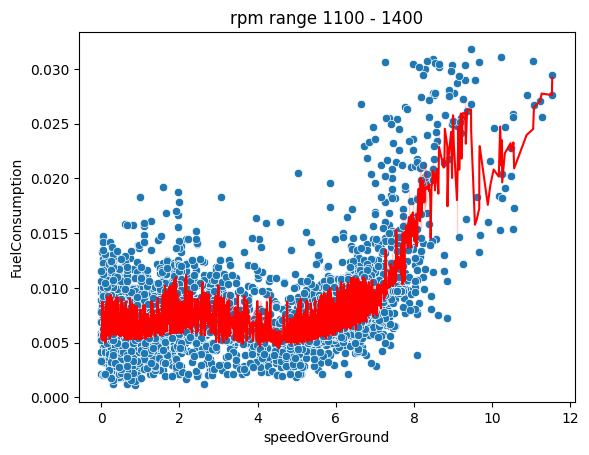

In [328]:
sns.scatterplot(data=sample_1_rpm_3, x="speedOverGround", y="FuelConsumption").set(title="rpm range 1100 - 1400")
sns.lineplot(data=sample_1_rpm_3, x="speedOverGround", y="FuelPred_xgbr", color="r")

<AxesSubplot: title={'center': 'rpm range 1400 - 1700'}, xlabel='speedOverGround', ylabel='FuelConsumption'>

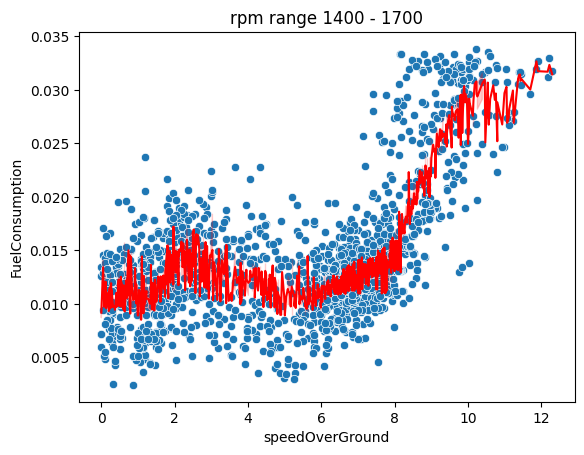

In [329]:
sns.scatterplot(data=sample_1_rpm_4, x="speedOverGround", y="FuelConsumption").set(title="rpm range 1400 - 1700")
sns.lineplot(data=sample_1_rpm_4, x="speedOverGround", y="FuelPred_xgbr", color="r")

<AxesSubplot: title={'center': 'rpm range 1700 - 2015'}, xlabel='speedOverGround', ylabel='FuelConsumption'>

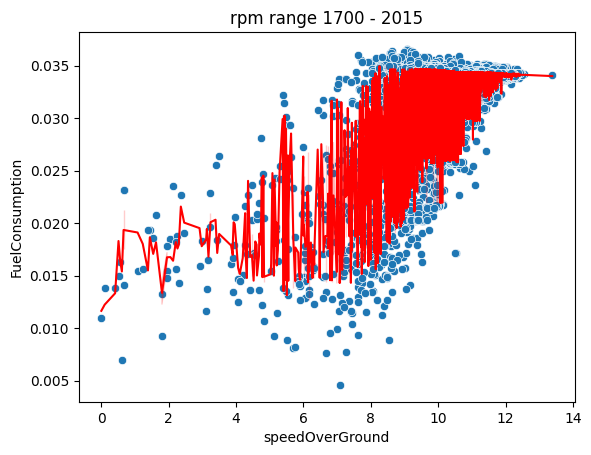

In [330]:
sns.scatterplot(data=sample_1_rpm_5, x="speedOverGround", y="FuelConsumption").set(title="rpm range 1700 - 2015")
sns.lineplot(data=sample_1_rpm_5, x="speedOverGround", y="FuelPred_xgbr", color="r")

In [307]:
df_test_fuel_rpm = df_test[['FuelConsumption', 'engineSpeed', "Cat_speed", 'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn', 'FuelPred_tree', 'FuelPred_gbr', 'FuelPred_xgbr', 'FuelPred_rfr']]

In [421]:
sample_2 = df_test_fuel_rpm.sample(n=500)

In [416]:
sample_2_speed_1 = sample_2[sample_2.Cat_speed == pd.Interval(0, 3)]
sample_2_speed_2 = sample_2[sample_2.Cat_speed == pd.Interval(3, 6)]
sample_2_speed_3 = sample_2[sample_2.Cat_speed == pd.Interval(6, 9)]
sample_2_speed_4 = sample_2[sample_2.Cat_speed == pd.Interval(9, 12)]
sample_2_speed_5 = sample_2[sample_2.Cat_speed == pd.Interval(12, 15)]

In [417]:
sample_2_speed_1.shape, sample_2_speed_2.shape, sample_2_speed_3.shape, sample_2_speed_4.shape, sample_2_speed_5.shape

((8375, 10), (8534, 10), (8226, 10), (20518, 10), (722, 10))

In [422]:
score_sample_2 = metrics.r2_score(sample_2.FuelConsumption, sample_2.FuelPred_xgbr)
score_sample_2

0.9922356655019324

In [418]:
score_sample_2_speed_1 = metrics.r2_score(sample_2_speed_1.FuelConsumption, sample_2_speed_1.FuelPred_xgbr)
score_sample_2_speed_2 = metrics.r2_score(sample_2_speed_2.FuelConsumption, sample_2_speed_2.FuelPred_xgbr)
score_sample_2_speed_3 = metrics.r2_score(sample_2_speed_3.FuelConsumption, sample_2_speed_3.FuelPred_xgbr)
score_sample_2_speed_4 = metrics.r2_score(sample_2_speed_4.FuelConsumption, sample_2_speed_4.FuelPred_xgbr)
score_sample_2_speed_5 = metrics.r2_score(sample_2_speed_5.FuelConsumption, sample_2_speed_5.FuelPred_xgbr)

In [419]:
score_sample_2_speed_1, score_sample_2_speed_2, score_sample_2_speed_3, score_sample_2_speed_4, score_sample_2_speed_5

(0.7812043452902113,
 0.8419287765896293,
 0.8690267255447349,
 0.8379082924209414,
 0.2101869901510689)

<AxesSubplot: title={'center': 'Speed range 0 - 3'}, xlabel='engineSpeed', ylabel='FuelConsumption'>

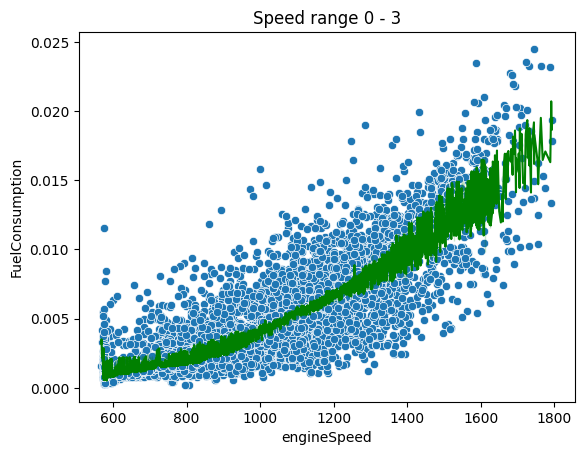

In [340]:
sns.scatterplot(data=sample_2_speed_1, x="engineSpeed", y="FuelConsumption").set(title="Speed range 0 - 3")
sns.lineplot(data=sample_2_speed_1, x="engineSpeed", y="FuelPred_xgbr", color="g")

<AxesSubplot: title={'center': 'Speed range 3 - 6'}, xlabel='engineSpeed', ylabel='FuelConsumption'>

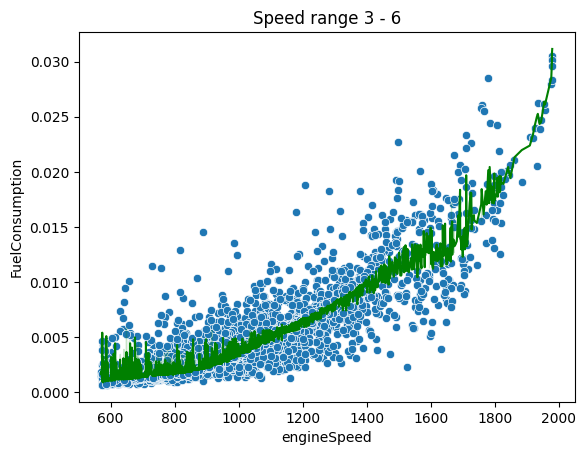

In [341]:
sns.scatterplot(data=sample_2_speed_2, x="engineSpeed", y="FuelConsumption").set(title="Speed range 3 - 6")
sns.lineplot(data=sample_2_speed_2, x="engineSpeed", y="FuelPred_xgbr", color="g")

<AxesSubplot: title={'center': 'Speed range 6 - 9'}, xlabel='engineSpeed', ylabel='FuelConsumption'>

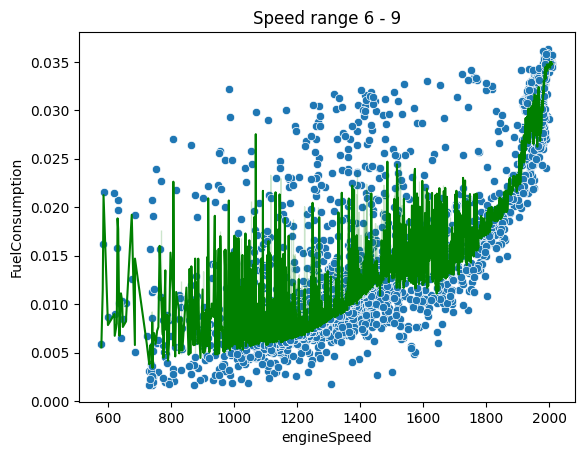

In [342]:
sns.scatterplot(data=sample_2_speed_3, x="engineSpeed", y="FuelConsumption").set(title="Speed range 6 - 9")
sns.lineplot(data=sample_2_speed_3, x="engineSpeed", y="FuelPred_xgbr", color="g")

<AxesSubplot: title={'center': 'Speed range 9 - 12'}, xlabel='engineSpeed', ylabel='FuelConsumption'>

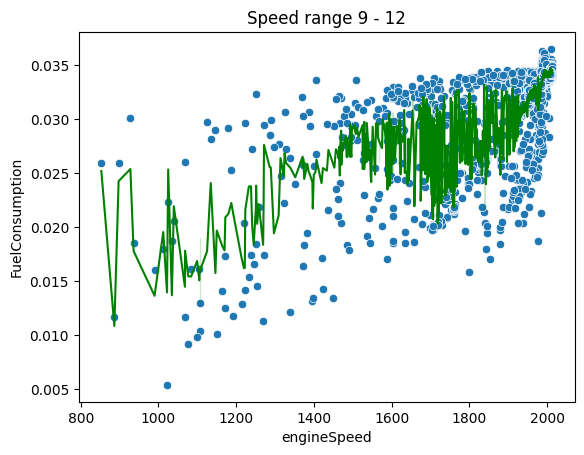

In [343]:
sns.scatterplot(data=sample_2_speed_4, x="engineSpeed", y="FuelConsumption").set(title="Speed range 9 - 12")
sns.lineplot(data=sample_2_speed_4, x="engineSpeed", y="FuelPred_xgbr", color="g")

<AxesSubplot: title={'center': 'Speed range 12 - 15'}, xlabel='engineSpeed', ylabel='FuelConsumption'>

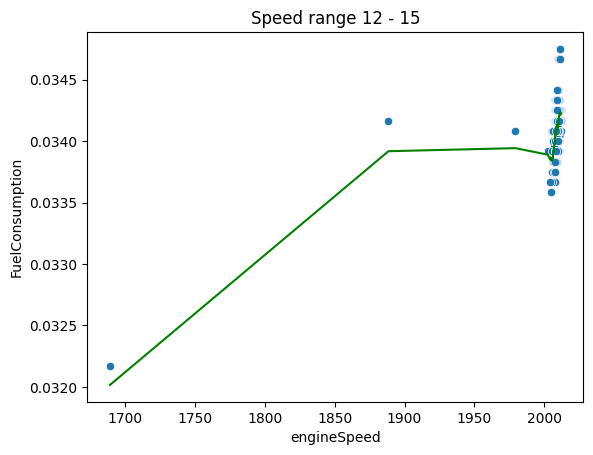

In [344]:
sns.scatterplot(data=sample_2_speed_5, x="engineSpeed", y="FuelConsumption").set(title="Speed range 12 - 15")
sns.lineplot(data=sample_2_speed_5, x="engineSpeed", y="FuelPred_xgbr", color="g")

## Errors and Accuracy of the model for different time periods

- ### Predict & compare the August data by using the model we fitted from July data

In [59]:
df_aug = pd.read_csv(r'C:\Users\Kun\Downloads\month_8.csv')
df_aug.head()

C:\Users\Kun\AppData\Local\Temp\ipykernel_1016\1959893458.py:1: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aug = pd.read_csv(r'C:\Users\Kun\Downloads\month_8.csv')


,Unnamed: 0,timestamp,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,...,legUUID,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg
0,15525560,2022-08-01 00:00:00.000,0.0,0.0,59.331697,18.079136,97.6950,134.8972,3.54,3.80,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.031469,11100.0
1,15525561,2022-08-01 00:00:00.300,0.0,0.0,59.331697,18.079137,104.3929,140.0939,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.061336,11100.3
2,15525562,2022-08-01 00:00:00.600,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.089235,11100.6
3,15525563,2022-08-01 00:00:00.900,0.0,0.0,59.331697,18.079137,104.3929,144.7922,3.24,3.24,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.114853,11100.9
4,15525564,2022-08-01 00:00:01.200,0.0,0.0,59.331697,18.079137,105.9972,141.6925,3.24,3.18,...,c7832720-f928-4ba0-87a4-392c0a70e0ec,NaN,305,NaN,NaN,56869,f265fc5d-5f41-4cba-b1ca-af4baecca8e7,0.0,760.137870,11101.2


- Data cleaning

In [60]:
df_aug = df_aug.loc[df_aug.engineSpeed > 550]
df_aug.shape

(694737, 49)

In [61]:
df_aug['FuelConsumption'] = df_aug['engineFuelRate']*0.3/3600

C:\Users\Kun\AppData\Local\Temp\ipykernel_1016\2625916470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['FuelConsumption'] = df_aug['engineFuelRate']*0.3/3600


In [62]:
X_aug, y_aug = df_aug[["engineSpeed", "speedOverGround"]], df_aug["FuelConsumption"]

In [94]:
scaler = MinMaxScaler()
scaler.fit(X_aug)

scaled_X_aug = scaler.transform(X_aug)
scaled_X_aug.shape,  y_aug.shape

((694737, 2), (694737,))

- Create SVD, Polynormial, Knn, Decision Trees, Random forest predictors for df_aug by using the model from July

In [95]:
df_aug['FuelPred_SVD'] = model_SVD.predict(scaled_X_aug)

X_features_aug = poly_model_4.fit_transform(scaled_X_aug)

df_aug['FuelPred_Poly'] = model_poly.predict(X_features_aug)

df_aug['FuelPred_knn'] = knn_reg.predict(scaled_X_aug)

df_aug['FuelPred_tree'] = model_tree_regression.predict(X_aug)

df_aug['FuelPred_gbr'] = gbr.predict(X_aug)

df_aug['FuelPred_xgbr'] = xgbr.predict(X_aug)

df_aug['FuelPred_rfr'] = rfr.predict(scaled_X_aug)

df_aug.columns


C:\Users\Kun\AppData\Local\Temp\ipykernel_9440\1062723535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['FuelPred_SVD'] = model_SVD.predict(scaled_X_aug)
C:\Users\Kun\AppData\Local\Temp\ipykernel_9440\1062723535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aug['FuelPred_Poly'] = model_poly.predict(X_features_aug)
C:\Users\Kun\AppData\Local\Temp\ipykernel_9440\1062723535.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Index(['Unnamed: 0', 'timestamp', 'engineFuelRate', 'engineSpeed', 'latitude',
       'longitude', 'windDirectionApparent', 'windDirectionTrue',
       'windSpeedApparent', 'windSpeedOverGround', 'engineTripFuel',
       'temperature', 'magneticVariation', 'satellites', 'pitch', 'rateOfTurn',
       'roll', 'pressure', 'courseOverGroundTrue', 'headingMagnetic',
       'headingTrue', 'speedOverGround', 'deltaDistance', 'fileName',
       'deltaTimestamp', 'fuelPerStep', 'fuelPerStepEngineTrip',
       'acceleration', 'windSpeedApparentCalculated',
       'windDirectionApparentCalculated', 'courseHeadingDiff', 'engineOn',
       'steadyState', 'sailingState', 'distanceFromDock', 'closestDock',
       'segmentState', 'leg', 'legId', 'legUUID', 'on_route', 'mainRouteId',
       'distanceToNextDock', 'distanceToPreviousDock', 'segmentId',
       'segmentUUID', 'accumFuelLeg', 'accumDistLeg', 'accumTimeLeg',
       'FuelConsumption', 'FuelPred_SVD', 'FuelPred_Poly', 'FuelPred_knn',
       'F

In [96]:
df_new_aug = df_aug[["timestamp", "FuelConsumption", "FuelPred_SVD", "FuelPred_Poly", "FuelPred_knn", "FuelPred_tree", 'FuelPred_gbr','FuelPred_xgbr', "FuelPred_rfr"]]

In [97]:
df_new_aug['timestamp'] = pd.to_datetime(df_new_aug['timestamp'])

C:\Users\Kun\AppData\Local\Temp\ipykernel_9440\1040093416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_aug['timestamp'] = pd.to_datetime(df_new_aug['timestamp'])


- Total fuel consumptions & predictors with different algorithms calculate by days

In [98]:
df_days_aug = df_new_aug.groupby(pd.Grouper(key = 'timestamp', freq = 'D')).sum().reset_index()
df_days_aug.head()

,timestamp,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_gbr,FuelPred_xgbr,FuelPred_rfr
0,2022-08-01,2306.730167,2411.038021,2141.121159,2471.145557,2287.718626,2282.998497,2287.927246,2457.527816
1,2022-08-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2022-08-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [99]:
mae_SVD_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_SVD)
mae_Poly_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_Poly)
mae_knn_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_knn)
mae_tree_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_tree)
mae_gbr_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_gbr)
mae_xgbr_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_xgbr)
mae_rfr_days_aug = mean_absolute_error(df_days_aug.FuelConsumption, df_days_aug.FuelPred_rfr)

print(f"Absolute Error (days) is {mae_SVD_days_aug:.2f} for model SVD") 
print(f"{mae_Poly_days_aug:.2f} for model Polynormial") 
print(f"{mae_knn_days_aug:.2f} for model KNN")
print(f"{mae_tree_days_aug:.2f} for decision trees") 
print(f"{mae_gbr_days_aug:.2f} for GBR") 
print(f"{mae_xgbr_days_aug:.2f} for XGBR") 
print(f"{mae_rfr_days_aug:.2f} for random forest")

Absolute Error (days) is 18.32 for model SVD
30.28 for model Polynormial
35.38 for model KNN
3.88 for decision trees
4.32 for GBR
3.88 for XGBR
31.29 for random forest


<AxesSubplot: >

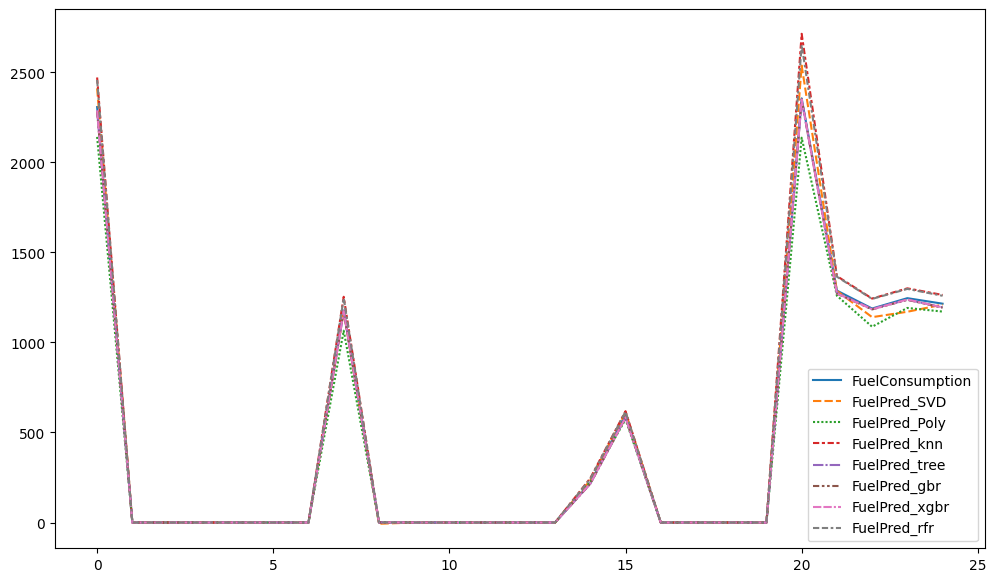

In [100]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_days_aug)

- Total fuel consumptions & predictors with different algorithms calculate by weeks


In [101]:
df_weeks_aug = df_new_aug.groupby(pd.Grouper(key = 'timestamp', freq = 'W')).sum().reset_index()
df_weeks_aug

,timestamp,FuelConsumption,FuelPred_SVD,FuelPred_Poly,FuelPred_knn,FuelPred_tree,FuelPred_gbr,FuelPred_xgbr,FuelPred_rfr
0,2022-08-07,2306.730167,2411.038021,2141.121159,2471.145557,2287.718626,2282.998497,2287.927246,2457.527816
1,2022-08-14,1178.051875,1165.530711,1066.390592,1254.314687,1174.256591,1173.958685,1174.036377,1246.296908
2,2022-08-21,3173.135083,3384.140773,2935.349961,3578.072378,3142.567996,3147.267208,3147.636963,3510.368965
3,2022-08-28,4936.613858,4806.403331,4709.104229,5175.572885,4893.820487,4883.033999,4888.616211,5162.608152


In [102]:
mae_SVD_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_SVD)
mae_Poly_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_Poly)
mae_knn_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_knn)
mae_tree_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_tree)
mae_gbr_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_gbr)
mae_xgbr_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_xgbr)
mae_rfr_weeks_aug = mean_absolute_error(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_rfr)

print(f"Absolute Error (days) is {mae_SVD_weeks_aug:.2f} for model SVD") 
print(f"{mae_Poly_weeks_aug:.2f} for model Polynormial") 
print(f"{mae_knn_weeks_aug:.2f} for model KNN")
print(f"{mae_tree_weeks_aug:.2f} for decision trees") 
print(f"{mae_gbr_weeks_aug:.2f} for GBR") 
print(f"{mae_xgbr_weeks_aug:.2f} for XGBR") 
print(f"{mae_rfr_weeks_aug:.2f} for random forest")

Absolute Error (days) is 114.51 for model SVD
185.64 for model Polynormial
221.14 for model KNN
24.04 for decision trees
26.82 for GBR
24.08 for XGBR
195.57 for random forest


<AxesSubplot: >

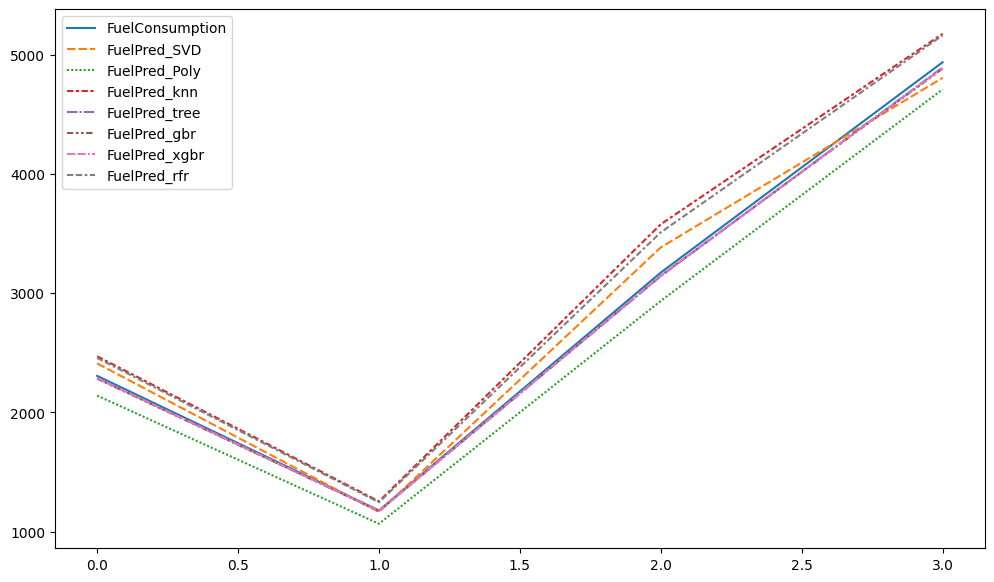

In [103]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_weeks_aug)

#### Accuracy for different models during time period


- Accuracy for days predictors


In [104]:
from sklearn import metrics 

In [105]:
print(f"The accuracy for Linear Regression:      {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_SVD):.7f}")
print(f"The accuracy for Polynormial Regression: {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_Poly):.7f}")
print(f"The accuracy for KNN:                    {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_knn):.7f}")
print(f"The accuracy for Decision Tree:          {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_tree):.7f}")
print(f"The accuracy for GBR:                    {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_gbr):.7f}")
print(f"The accuracy for XGBR:                   {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_xgbr):.7f}")
print(f"The accuracy for Random forest:          {metrics.r2_score(df_days_aug.FuelConsumption, df_days_aug.FuelPred_rfr):.7f}")

The accuracy for Linear Regression:      0.9960803
The accuracy for Polynormial Regression: 0.9922034
The accuracy for KNN:                    0.9867435
The accuracy for Decision Tree:          0.9998971
The accuracy for GBR:                    0.9998639
The accuracy for XGBR:                   0.9998939
The accuracy for Random forest:          0.9903113


- Accuracy for weeks predictors


In [106]:
print(f"The accuracy for Linear Regression:      {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_SVD):.7f}")
print(f"The accuracy for Polynormial Regression: {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_Poly):.7f}")
print(f"The accuracy for KNN:                    {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_knn):.7f}")
print(f"The accuracy for Decision Tree:          {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_tree):.7f}")
print(f"The accuracy for GBR:                    {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_gbr):.7f}")
print(f"The accuracy for XGBR:                    {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_xgbr):.7f}")
print(f"The accuracy for Random forest:          {metrics.r2_score(df_weeks_aug.FuelConsumption, df_weeks_aug.FuelPred_rfr):.7f}")

The accuracy for Linear Regression:      0.9903819
The accuracy for Polynormial Regression: 0.9803438
The accuracy for KNN:                    0.9663207
The accuracy for Decision Tree:          0.9995833
The accuracy for GBR:                    0.9994536
The accuracy for XGBR:                    0.9995592
The accuracy for Random forest:          0.9745078


### Analyse how long time is needed for tuning the model and how it can be corrected over time.


In [107]:
df.timestamp = pd.to_datetime(df.timestamp)

C:\Users\Kun\AppData\Local\Temp\ipykernel_9440\1453239151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.timestamp = pd.to_datetime(df.timestamp)


In [108]:
df_2 = df.set_index('timestamp')

In [109]:
df_2.head()

,Unnamed: 0,engineFuelRate,engineSpeed,latitude,longitude,windDirectionApparent,windDirectionTrue,windSpeedApparent,windSpeedOverGround,engineTripFuel,...,on_route,mainRouteId,distanceToNextDock,distanceToPreviousDock,segmentId,segmentUUID,accumFuelLeg,accumDistLeg,accumTimeLeg,FuelConsumption
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-07-01 07:49:42.900,8111235,3.0,752.00,59.331634,18.079097,283.5912,139.5954,6.53,6.68,1547244.0,...,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.327333,5680.895903,99345.9,0.00025
2022-07-01 07:49:43.200,8111236,3.0,772.75,59.331634,18.079097,281.4426,139.5954,6.66,6.68,1547244.0,...,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.327583,5680.908730,99346.2,0.00025
2022-07-01 07:49:43.500,8111237,3.0,793.50,59.331634,18.079097,279.2940,139.5954,6.79,6.68,1547244.0,...,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.327833,5680.920161,99346.5,0.00025
2022-07-01 07:49:43.800,8111238,3.0,766.50,59.331634,18.079097,279.2940,131.5969,6.79,6.37,1547244.0,...,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.328083,5680.930525,99346.8,0.00025
2022-07-01 07:49:44.100,8111239,3.0,707.00,59.331634,18.079097,271.8914,130.0958,6.89,6.89,1547244.0,...,NaN,119,NaN,NaN,29110,c07a858d-4a80-4985-92ca-f49277915740,29.328333,5680.940225,99347.1,0.00025


In [110]:
df_new_july = df[["timestamp", "FuelConsumption"]]

In [111]:
# check if there is some missing values (boat not start) in days
df_days_july = df_new_july.groupby(pd.Grouper(key = 'timestamp', freq = 'D')).sum().reset_index()
df_days_july 

,timestamp,FuelConsumption
0,2022-07-01,2451.857292
1,2022-07-02,1769.952000
2,2022-07-03,2463.291833
3,2022-07-04,2152.100833
4,2022-07-05,1519.902958
5,2022-07-06,2143.342250
6,2022-07-07,2073.228833
7,2022-07-08,2347.091667
8,2022-07-09,1977.930542
9,2022-07-10,2132.967792


- The first 14 days (2 weeks) are available for analysis

Build the Decision tree model based on data from 1st day in July

In [112]:
df_1st_day = df_2['2022-07-01':'2022-07-01']
df_1st_day.shape

(149627, 49)

In [113]:
X_day_july, y_day_july = df_1st_day[["engineSpeed", "speedOverGround"]], df_1st_day["FuelConsumption"]
X_day_july.shape, y_day_july.shape

((149627, 2), (149627,))

In [114]:
scaler = MinMaxScaler()
scaler.fit(X_day_july)

scaled_X_day_july = scaler.transform(X_day_july)
scaled_X_day_july.shape

(149627, 2)

In [115]:
knn_reg_day = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform')
knn_reg_day.fit(scaled_X_day_july, y_day_july)

KNeighborsRegressor(n_neighbors=7)

In [116]:
model_tree_regression_day = DecisionTreeRegressor(max_depth = 7) 
model_tree_regression_day.fit(X_day_july, y_day_july)

model_gbr_day = GBR(max_depth = 7) 
model_gbr_day.fit(X_day_july, y_day_july)

model_xgbr_day = xgb.XGBRegressor(max_depth=7, booster='gbtree')
model_xgbr_day.fit(X_day_july, y_day_july)

X_train_features_days = poly_model_4.fit_transform(scaled_X_day_july)
model_poly_day = LinearRegression()
model_poly_day.fit(X_train_features_days, y_day_july)

LinearRegression()

In [117]:
print(f"The accuracy for Decision Tree based on 1 day data model:  {model_tree_regression_day.score(X_aug, y_aug):7f}")
print(f"The accuracy for KNN based on 1 day data model:  {knn_reg_day.score(scaled_X_aug, y_aug):7f}")
print(f"The accuracy for GBR based on 1 day data model:  {model_gbr_day.score(X_aug, y_aug):7f}")
print(f"The accuracy for XGBR based on 1 day data model:  {model_xgbr_day.score(X_aug, y_aug):7f}")
print(f"The accuracy for PolyNormial based on 1 day data model:  {model_poly_day.score(X_features_aug, y_aug):7f}")

The accuracy for Decision Tree based on 1 day data model:  0.986825
The accuracy for KNN based on 1 day data model:  0.983834
The accuracy for GBR based on 1 day data model:  0.987842
The accuracy for XGBR based on 1 day data model:  0.988167
The accuracy for PolyNormial based on 1 day data model:  0.987530


In [118]:
y_tree_pred_day = model_tree_regression_day.predict(X_aug)
y_gbr_pred_day = model_gbr_day.predict(X_aug)
y_xgbr_pred_day = model_xgbr_day.predict(X_aug)
y_poly_pred_day = model_poly_day.predict(X_features_aug)
y_knn_pred_day = knn_reg_day.predict(scaled_X_aug)

mae_tree_day = mean_absolute_error(y_aug, y_tree_pred_day)
mae_gbr_day = mean_absolute_error(y_aug, y_gbr_pred_day)
mae_xgbr_day = mean_absolute_error(y_aug, y_xgbr_pred_day)
mae_poly_day = mean_absolute_error(y_aug, y_poly_pred_day)
mae_knn_day = mean_absolute_error(y_aug, y_knn_pred_day)


print(f"The MAE of tree based on 1 day model is : {mae_tree_day:7f}")
print(f"The MAE of gbr based on 1 day model is : {mae_gbr_day:7f}")
print(f"The MAE of xgbr based on 1 day model is : {mae_xgbr_day:7f}")
print(f"The MAE of Polynormial based on 1 day model is : {mae_poly_day:7f}")
print(f"The MAE of KNN based on 1 day model is : {mae_knn_day:7f}")

The MAE of tree based on 1 day model is : 0.000718
The MAE of gbr based on 1 day model is : 0.000674
The MAE of xgbr based on 1 day model is : 0.000659
The MAE of Polynormial based on 1 day model is : 0.000979
The MAE of KNN based on 1 day model is : 0.000945


Build the Decision tree model based on data from 2 days in July

In [119]:
df_2_days = df_2['2022-07-01':'2022-07-02']
df_2_days.shape

(247903, 49)

In [120]:
X_2_days_july, y_2_days_july = df_2_days[["engineSpeed", "speedOverGround"]], df_2_days["FuelConsumption"]

In [124]:
scaler = MinMaxScaler()
scaler.fit(X_2_days_july)

scaled_X_2_days_july = scaler.transform(X_2_days_july)
scaled_X_2_days_july.shape

(247903, 2)

In [122]:
knn_reg_2_days = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform')
knn_reg_2_days.fit(scaled_X_2_days_july, y_2_days_july)

KNeighborsRegressor(n_neighbors=7)

In [123]:
model_tree_regression_2_days = DecisionTreeRegressor(max_depth = 7) 
model_tree_regression_2_days.fit(X_2_days_july, y_2_days_july)

model_gbr_2_days = GBR(max_depth = 7) 
model_gbr_2_days.fit(X_2_days_july, y_2_days_july)

model_xgbr_2_days = xgb.XGBRegressor(max_depth=7, booster='gbtree')
model_xgbr_2_days.fit(X_2_days_july, y_2_days_july)

X_train_features_2_days = poly_model_4.fit_transform(scaled_X_2_days_july)
model_poly_2_days = LinearRegression()
model_poly_2_days.fit(X_train_features_2_days, y_2_days_july)

KeyboardInterrupt: 

In [ ]:
print(f"The accuracy for Decision Tree based on 2 days data model:  {model_tree_regression_2_days.score(X_aug, y_aug):7f}")
print(f"The accuracy for KNN based on 2 days data model:  {knn_reg_2_days.score(scaled_X_aug, y_aug):7f}")
print(f"The accuracy for GBR based on 2 days data model:  {model_gbr_2_days.score(X_aug, y_aug):7f}")
print(f"The accuracy for XGBR based on 2 days data model:  {model_xgbr_2_days.score(X_aug, y_aug):7f}")
print(f"The accuracy for PolyNormial based on 2 days data model:  {model_poly_2_days.score(X_features_aug, y_aug):7f}")

The accuracy for Decision Tree based on 2 days data model:  0.986735
The accuracy for KNN based on 2 days data model:  0.983010
The accuracy for GBR based on 2 days data model:  0.988120
The accuracy for PolyNormial based on 2 days data model:  0.974073


In [ ]:
y_tree_pred_2_days = model_tree_regression_2_days.predict(X_aug)
y_gbr_pred_2_days = model_gbr_2_days.predict(X_aug)
y_xgbr_pred_2_days = model_xgbr_2_days.predict(X_aug)
y_poly_pred_2_days = model_poly_2_days.predict(X_features_aug)
y_knn_pred_2_days = knn_reg_2_days.predict(scaled_X_aug)

mae_tree_2_days = mean_absolute_error(y_aug, y_tree_pred_2_days)
mae_gbr_2_days = mean_absolute_error(y_aug, y_gbr_pred_2_days)
mae_xgbr_2_days = mean_absolute_error(y_aug, y_xgbr_pred_2_days)
mae_poly_2_days = mean_absolute_error(y_aug, y_poly_pred_2_days)
mae_knn_2_days = mean_absolute_error(y_aug, y_knn_pred_2_days)


print(f"The MAE of tree based on 2 days model is : {mae_tree_2_days:7f}")
print(f"The MAE of gbr based on 2 days model is : {mae_gbr_2_days:7f}")
print(f"The MAE of xgbr based on 2 days model is : {mae_xgbr_2_days:7f}")
print(f"The MAE of Polynormial based on 2 days model is : {mae_poly_2_days:7f}")
print(f"The MAE of Knn based on 2 days model is : {mae_knn_2_days:7f}")

The MAE of tree based on 2 days model is : 0.000738
The MAE of gbr based on 2 days model is : 0.000663
The MAE of Polynormial based on 2 days model is : 0.001741
The MAE of Knn based on 2 days model is : 0.000996


Build the Decision tree model based on data from 1 week in July

In [ ]:
df_week = df_2['2022-07-01':'2022-07-07']
df_week.shape

(853973, 49)

In [ ]:
X_week_july, y_week_july = df_week[["engineSpeed", "speedOverGround"]], df_week["FuelConsumption"]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_week_july)

scaled_X_week_july = scaler.transform(X_week_july)
scaled_X_week_july.shape

(853973, 2)

In [ ]:
knn_reg_week = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform')
knn_reg_week.fit(scaled_X_week_july, y_week_july)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
model_tree_regression_week = DecisionTreeRegressor(max_depth = 7) 
model_tree_regression_week.fit(X_week_july, y_week_july)

model_gbr_week = GBR(max_depth = 7) 
model_gbr_week.fit(X_week_july, y_week_july)

model_xgbr_week = xgb.XGBRegressor(max_depth=7, booster='gbtree')
model_xgbr_week.fit(X_week_july, y_week_july)

X_train_features_week = poly_model_4.fit_transform(scaled_X_week_july)
model_poly_week = LinearRegression()
model_poly_week.fit(X_train_features_week, y_week_july)

LinearRegression()

In [ ]:
print(f"The accuracy for Decision Tree based on 1 week data model:  {model_tree_regression_week.score(X_aug, y_aug):7f}")
print(f"The accuracy for GBR based on 1 week data model:  {model_gbr_week.score(X_aug, y_aug):7f}")
print(f"The accuracy for XGBR based on 1 week data model:  {model_xgbr_week.score(X_aug, y_aug):7f}")
print(f"The accuracy for PolyNormial based on 1 week data model:  {model_poly_week.score(X_features_aug, y_aug):7f}")
print(f"The accuracy for Knn based on 1 week data model:  {knn_reg_week.score(scaled_X_aug, y_aug):7f}")

The accuracy for Decision Tree based on 1 week data model:  0.989269
The accuracy for GBR based on 1 week data model:  0.989977
The accuracy for PolyNormial based on 1 week data model:  0.956630
The accuracy for Knn based on 1 week data model:  0.973604


In [ ]:
y_tree_pred_week = model_tree_regression_week.predict(X_aug)
y_gbr_pred_week = model_gbr_week.predict(X_aug)
y_xgbr_pred_week = model_xgbr_week.predict(X_aug)
y_poly_pred_week = model_poly_week.predict(X_features_aug)
y_knn_pred_week = knn_reg_week.predict(scaled_X_aug)

mae_tree_week = mean_absolute_error(y_aug, y_tree_pred_week)
mae_gbr_week = mean_absolute_error(y_aug, y_gbr_pred_week)
mae_xgbr_week = mean_absolute_error(y_aug, y_xgbr_pred_week)
mae_poly_week = mean_absolute_error(y_aug, y_poly_pred_week)
mae_knn_week = mean_absolute_error(y_aug, y_knn_pred_week)

print(f"The MAE of tree based on 1 week model is : {mae_tree_week:7f}")
print(f"The MAE of gbr based on 1 week model is : {mae_gbr_week:7f}")
print(f"The MAE of xgbr based on 1 week model is : {mae_xgbr_week:7f}")
print(f"The MAE of Polynormial based on 1 week model is : {mae_poly_week:7f}")
print(f"The MAE of knn based on 1 week model is : {mae_knn_week:7f}")

The MAE of tree based on 1 week model is : 0.000701
The MAE of gbr based on 1 week model is : 0.000670
The MAE of Polynormial based on 1 week model is : 0.002270
The MAE of knn based on 1 week model is : 0.001294


Build the Decision tree model based on data from 2 weeks in July

In [ ]:
df_2_week = df_2['2022-07-01':'2022-07-14']
df_2_week.shape

(1755726, 49)

In [ ]:
X_2_weeks_july, y_2_weeks_july = df_2_week[["engineSpeed", "speedOverGround"]], df_2_week["FuelConsumption"]

In [ ]:
scaler.fit(X_2_weeks_july)

scaled_X_2_weeks_july = scaler.transform(X_2_weeks_july)
scaled_X_2_weeks_july.shape

(1755726, 2)

In [ ]:
knn_reg_2_weeks = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform')
knn_reg_2_weeks.fit(scaled_X_2_weeks_july, y_2_weeks_july)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
model_tree_regression_2_weeks = DecisionTreeRegressor(max_depth = 7) 
model_tree_regression_2_weeks.fit(X_2_weeks_july, y_2_weeks_july)

model_gbr_2_weeks = GBR(max_depth = 7) 
model_gbr_2_weeks.fit(X_2_weeks_july, y_2_weeks_july)

model_xgbr_2_weeks = xgb.XGBRegressor(max_depth=7, booster='gbtree')
model_xgbr_2_weeks.fit(X_2_weeks_july, y_2_weeks_july)

X_train_features_2_weeks = poly_model_4.fit_transform(scaled_X_2_weeks_july)
model_poly_2_weeks = LinearRegression()
model_poly_2_weeks.fit(X_train_features_2_weeks, y_2_weeks_july)

LinearRegression()

In [ ]:
print(f"The accuracy for Decision Tree based on 2 weeks data model:  {model_tree_regression_2_weeks.score(X_aug, y_aug):7f}")
print(f"The accuracy for GBR based on 2 weeks data model:  {model_gbr_2_weeks.score(X_aug, y_aug):7f}")
print(f"The accuracy for XGBR based on 2 weeks data model:  {model_xgbr_2_weeks.score(X_aug, y_aug):7f}")
print(f"The accuracy for PolyNormial based on 2 weeks data model:  {model_poly_2_weeks.score(X_features_aug, y_aug):7f}")
print(f"The accuracy for Knn based on 2 weeks data model:  {knn_reg_2_weeks.score(scaled_X_aug, y_aug):7f}")

The accuracy for Decision Tree based on 2 weeks data model:  0.990841
The accuracy for GBR based on 2 weeks data model:  0.991730
The accuracy for PolyNormial based on 2 weeks data model:  0.934046
The accuracy for Knn based on 2 weeks data model:  0.957879


In [ ]:
y_tree_pred_2_weeks = model_tree_regression_2_weeks.predict(X_aug)
y_gbr_pred_2_weeks = model_gbr_2_weeks.predict(X_aug)
y_xgbr_pred_2_weeks = model_xgbr_2_weeks.predict(X_aug)
y_poly_pred_2_weeks = model_poly_2_weeks.predict(X_features_aug)
y_knn_pred_2_weeks = knn_reg_2_weeks.predict(scaled_X_aug)

mae_tree_2_weeks = mean_absolute_error(y_aug, y_tree_pred_2_weeks)
mae_gbr_2_weeks = mean_absolute_error(y_aug, y_gbr_pred_2_weeks)
mae_xgbr_2_weeks = mean_absolute_error(y_aug, y_xgbr_pred_2_weeks)
mae_poly_2_weeks = mean_absolute_error(y_aug, y_poly_pred_2_weeks)
mae_knn_2_weeks = mean_absolute_error(y_aug, y_knn_pred_2_weeks)

print(f"The MAE of tree based on 2 weeks model is : {mae_tree_2_weeks:7f}")
print(f"The MAE of gbr based on 2 weeks model is : {mae_gbr_2_weeks:7f}")
print(f"The MAE of xgbr based on 2 weeks model is : {mae_xgbr_2_weeks:7f}")
print(f"The MAE of Polynormial based on 2 weeks model is : {mae_poly_2_weeks:7f}")
print(f"The MAE of knn based on 2 weeks model is : {mae_knn_2_weeks:7f}")

The MAE of tree based on 2 weeks model is : 0.000636
The MAE of gbr based on 2 weeks model is : 0.000575
The MAE of Polynormial based on 2 weeks model is : 0.002748
The MAE of knn based on 2 weeks model is : 0.001531


| **Models**                   | **Scores**                          | **MAE**                             |
|------------------------------|-------------------------------------|-------------------------------------|
| Polynormial Regression       | 0.987530 0.974073 0.956630 0.934046 | 0.000979 0.001741 0.002270 0.002748 |
| KNN (n = 7)                  | 0.983834 0.983010 0.973604 0.957879 | 0.000945 0.000996 0.001294 0.001531 |
| Decision Tree(max_depth = 7) | 0.986825 0.986735 0.989269 0.990841 | 0.000718 0.000738 0.000701 0.000636 |
| GBDT (max_depth = 7)         | 0.987845 0.988120 0.989977 0.991730 | 0.000674 0.000663 0.000670 0.000575 |

Text(0.5, 0.98, 'Scores against Models for defferent time periods')

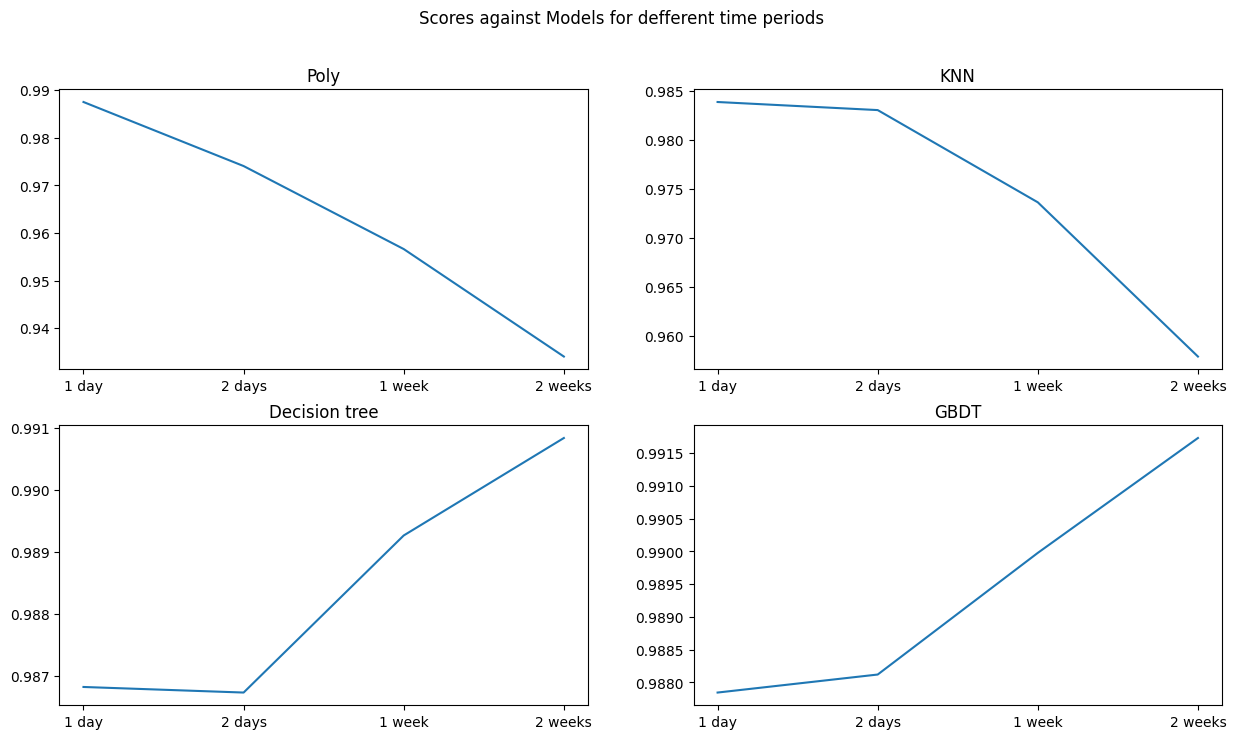

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
sns.lineplot(y=[0.987530, 0.974073, 0.956630, 0.934046], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[0,0]).set(title='Poly')
sns.lineplot(y=[0.983834, 0.983010, 0.973604, 0.957879], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[0,1]).set(title='KNN')
sns.lineplot(y=[0.986825, 0.986735, 0.989269, 0.990841], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[1,0]).set(title='Decision tree')
sns.lineplot(y=[0.987845, 0.988120, 0.989977, 0.991730], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[1,1]).set(title='GBDT')

fig.suptitle("Scores against Models for defferent time periods")

Text(0.5, 0.98, 'MAE against Models for defferent time periods')

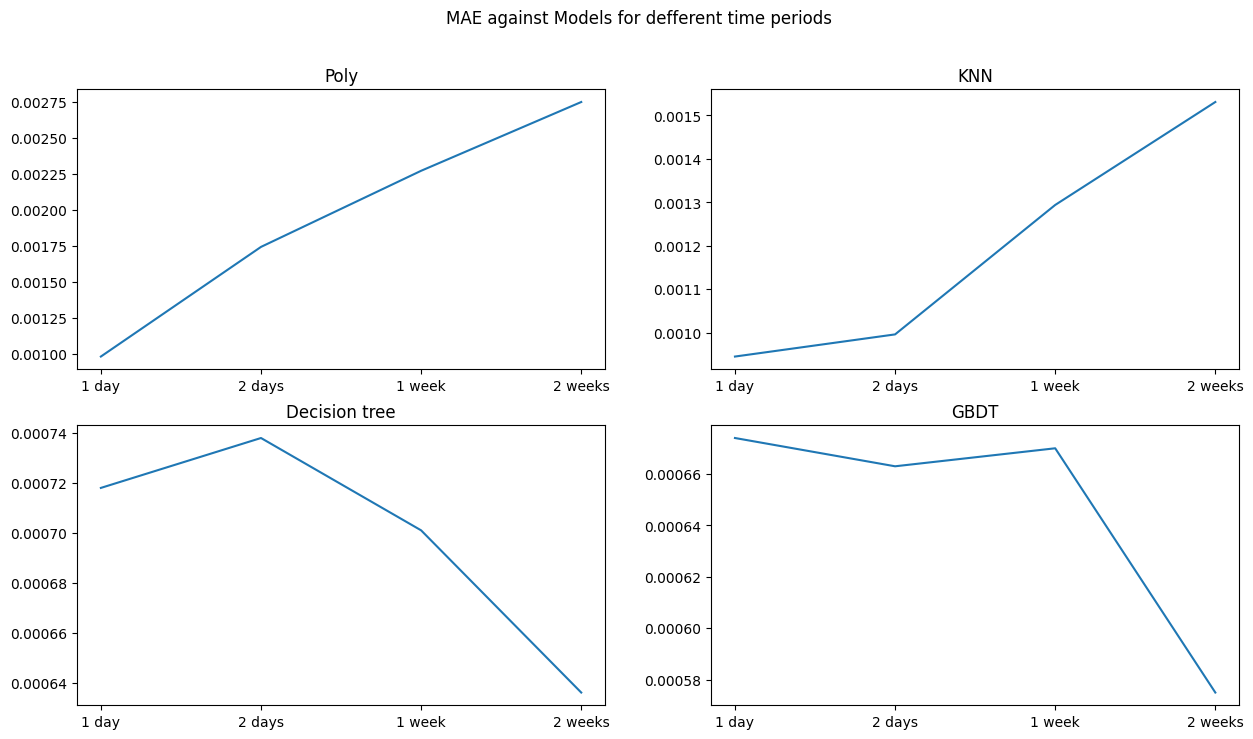

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
sns.lineplot(y=[0.000979, 0.001741, 0.002270, 0.002748], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[0,0]).set(title='Poly')
sns.lineplot(y=[0.000945, 0.000996, 0.001294, 0.001531], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[0,1]).set(title='KNN')
sns.lineplot(y=[0.000718, 0.000738, 0.000701, 0.000636], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[1,0]).set(title='Decision tree')
sns.lineplot(y=[0.000674, 0.000663, 0.000670, 0.000575], x=["1 day", "2 days", "1 week", "2 weeks"], ax = axes[1,1]).set(title='GBDT')

fig.suptitle("MAE against Models for defferent time periods")

- The more data size we train (From July), the better performance (in August) for Decision tree and GBDT models. However, the KNN and Polynormial regression are opposite (not stable) . 
- If we set a standard of accuracy (t.ex. 0.99), then 1 week data should be collected by using Decision tree or GBDT model.
- Decision tree and GBDT model perform better than others both on July(test data) and August.

In [39]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
import xgboost as xgb


In [40]:
model_SVD = LinearRegression(fit_intercept = True)
model_SVD.fit(scaled_X_train, scaled_y_train)
print(f"Parameters: {model_SVD.coef_}")
print(f"Intercept: {model_SVD.intercept_}")

import pickle
with open('saved_model/SVD.pickle','wb') as f:
    pickle.dump(model_SVD,f)



poly_model_4 = PolynomialFeatures(4, include_bias=False)
X_train_features = poly_model_4.fit_transform(scaled_X_train)
print(X_train_features.shape)

model_poly = LinearRegression()
model_poly.fit(X_train_features, scaled_y_train)
X_features_val_4_degree = poly_model_4.fit_transform(scaled_X_val)

with open('saved_model/poly.pickle','wb') as f:
    pickle.dump(model_poly,f)



knn_reg = neighbors.KNeighborsRegressor(n_neighbors=7, weights='uniform') # the defalt value of k is 5
knn_reg.fit(scaled_X_train, scaled_y_train)

with open('saved_model/knn.pickle','wb') as f:
    pickle.dump(knn_reg,f)



model_tree_regression = DecisionTreeRegressor(max_depth = 7) 
model_tree_regression.fit(scaled_X_train, scaled_y_train) 
with open('saved_model/tree_regression.pickle','wb') as f:
    pickle.dump(model_tree_regression,f)



gbr = GBR(max_depth = 7) 
gbr.fit(scaled_X_train, scaled_y_train)
with open('saved_model/gbr.pickle','wb') as f:
    pickle.dump(gbr,f)



xgbr = xgb.XGBRegressor(max_depth=7, booster='gbtree') 
xgbr.fit(scaled_X_train, scaled_y_train)
with open('saved_model/xgbr.pickle','wb') as f:
    pickle.dump(xgbr,f)

Parameters: [[0.90148414 0.21409697]]
Intercept: [-0.17103806]
(2295770, 14)


c:\Users\Kun\.virtualenvs\Deep_learning-JeCDGH9C\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
model_SVD.score(scaled_X_val, scaled_y_val)

0.9361513119200464

In [42]:
model_poly.score(X_features_val_4_degree,scaled_y_val)

0.9888413808863933

In [43]:
knn_reg.score(scaled_X_val, scaled_y_val)

0.9908557182831144

In [44]:
model_tree_regression.score(scaled_X_val, scaled_y_val)

0.9907050077894605

In [45]:
gbr.score(scaled_X_val, scaled_y_val)

0.9918284254176553

In [46]:
xgbr.score(scaled_X_val, scaled_y_val)

0.9919273624471636